In [4]:
#This is done in Python 2
#Typical Libraries
import sys
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Machine Learning Libraries
from sklearn import preprocessing, cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score

In [10]:
#loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
#naming the columns
names= ["id", "clump_thickness", "uniform_cell_shape", "uniform_cell_shape","marginal_adhesion", 
        "simple_epithelial_size", "bare_buclei", "bland_chromatin","normal_nuclei","mitoses","class"]

In [14]:
#storing the data as a pandas dataframe
df = pd.read_csv(url, names = names)
#Making some changes
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)
#looking at the dimensions of the dataset
print(df.shape)

(699, 10)


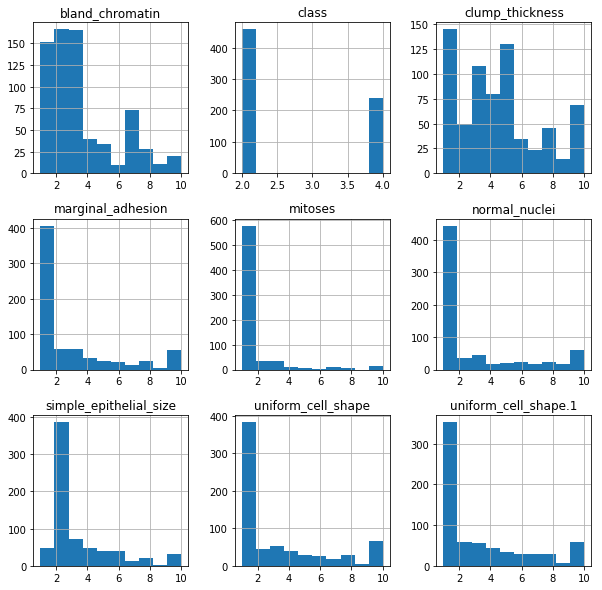

In [15]:
#Plot histogram for each variable
df.hist(figsize = (10,10))
plt.show()

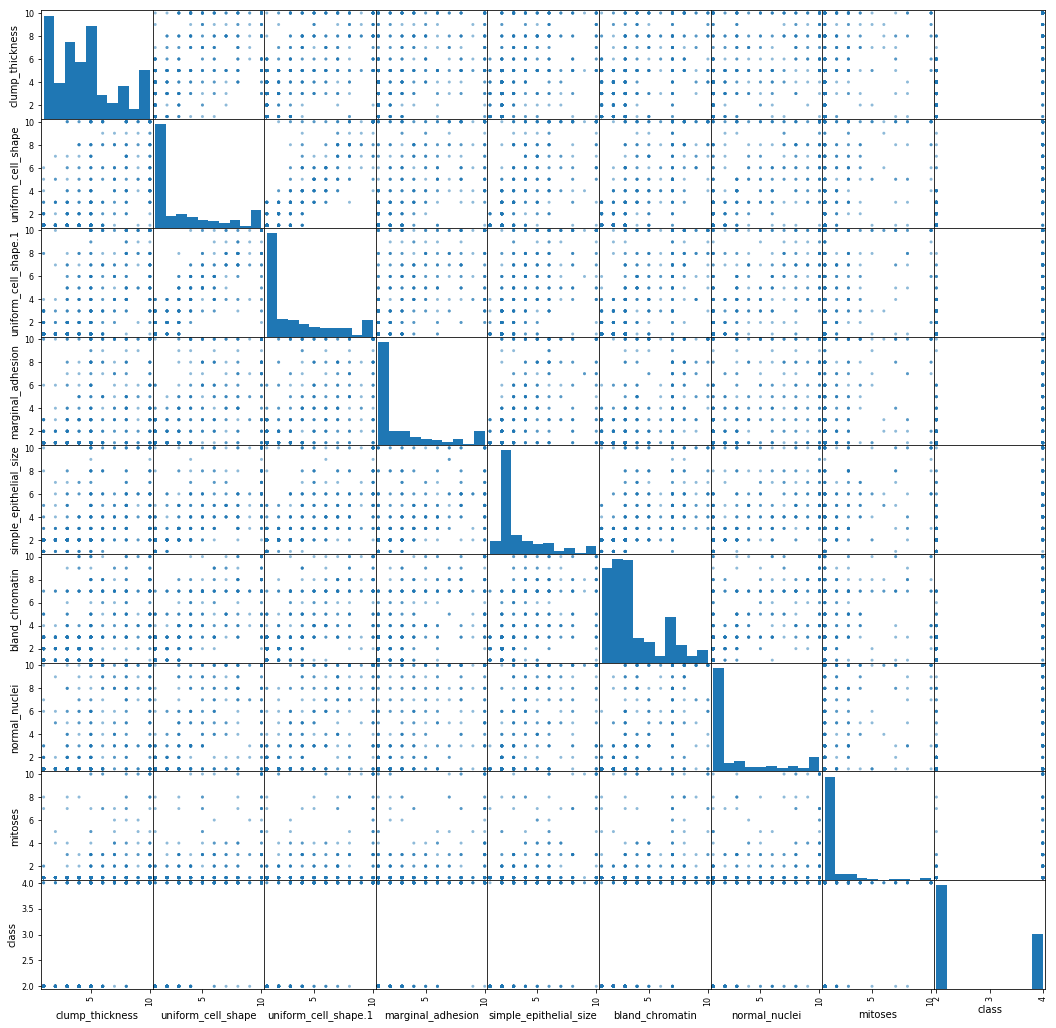

In [16]:
#Create scatter plot matrix
scatter_matrix(df, figsize = (18, 18))
plt.show()

In [19]:
#Create X and Y datasets for training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

#Train/Test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

#Specify testing options
seed = 8
scoring = 'accuracy'

In [21]:
#Define the models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(("SVM", SVC()))

#Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.967792 (0.020837)
SVM: 0.948117 (0.028186)


In [22]:
#Make predictions on validation dataset
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9714285714285714
             precision    recall  f1-score   support

          2       0.98      0.98      0.98        95
          4       0.96      0.96      0.96        45

avg / total       0.97      0.97      0.97       140

SVM
0.9785714285714285
             precision    recall  f1-score   support

          2       1.00      0.97      0.98        95
          4       0.94      1.00      0.97        45

avg / total       0.98      0.98      0.98       140



In [24]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,10]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

0.9785714285714285
[4]
